In [302]:
# To supress warnings
import warnings
warnings.filterwarnings("ignore")


import pandas as pd
import numpy as np
import statistics as sts
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import datetime
# Interactive plots
from ipywidgets import interact, fixed
from scipy import stats

In [303]:
df_raw = pd.read_csv('../Assets/raw_data.csv', delimiter=',')
df_raw.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0


### Data Structure

In [304]:
df_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [305]:
df_raw.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,2240.0,NaN,NaN,NaN,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,NaN,NaN,NaN,1968.805804,11.984069,1893.0,1959.0,1970.0,1977.0,1996.0
Education,2240,5,Graduation,1127,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,2240,8,Married,864,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,2216.0,NaN,NaN,NaN,52247.251354,25173.076661,1730.0,35303.0,51381.5,68522.0,666666.0
Kidhome,2240.0,NaN,NaN,NaN,0.444196,0.538398,0.0,0.0,0.0,1.0,2.0
Teenhome,2240.0,NaN,NaN,NaN,0.50625,0.544538,0.0,0.0,0.0,1.0,2.0
Dt_Customer,2240,663,8/31/2012,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Recency,2240.0,NaN,NaN,NaN,49.109375,28.962453,0.0,24.0,49.0,74.0,99.0
MntWines,2240.0,NaN,NaN,NaN,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0


Observations

* Graduation is the level of education most often.
* Married is the most common marital status.
* The average income is 52,200k
* The Year_Birth variable indicates under STD, therefore there is a Gaussian distribution.
* The mean age of the people in the dataset is 55 years.
* The maximum number of adolescents in the household is 2.
* The maximum number of small children in the home is 2.
* The variables *NumDealsPurchases*, *MntSweetProducts*, *NumDealsPurchases*, *NumCatalogPurchases*, *Incomes* could contain Outliers, as there is a large difference (to the right) between the 75th percentile and the maximum.
* 14% of the mailing sended obtained I accept (*Response* -> FREQ: 0.14)


In [306]:
df_raw.duplicated().sum()

0

Without duplicates.

In [307]:
df_raw.isnull().sum()

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

24 nulls in incomes, 1.04 percent of total values in column.

## Feature Engeenering.

In [308]:
data = df_raw.copy()

In [309]:
# Drop 'Id'
data = data.drop(columns='Id')

In [310]:
data.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain'],
      dtype='object')

We'll change the columns that relationship with Amount and Purchases. 
We'll use:
* *A_* for there columns relationship with "Amounts" 
* *P_* for there columns relationship with Purchases.

In [311]:
data = data.rename(columns={'MntWines':'A_Wines',
                    'MntFruits':'A_Fruits',
                    'MntMeatProducts':'A_Meat',
                    'MntFishProducts':'A_Fish',
                    'MntSweetProducts':'A_Sweet',
                    'MntGoldProds':'A_Gold',
                    'NumDealsPurchases':'P_Deals',
                    'NumWebPurchases':'P_Digital',
                    'NumCatalogPurchases':'P_Delivered_Shipping',
                    'NumStorePurchases':'P_NonDigital',
                    'NumWebVisitsMonth':'Qty_Visit_Web'})

In [312]:
# Convert Dt_customer object to date.
data.Dt_Customer = data.Dt_Customer.apply(lambda x : pd.to_datetime(str(x)))
data.Dt_Customer.describe()

count                    2240
unique                    663
top       2012-08-31 00:00:00
freq                       12
first     2012-01-08 00:00:00
last      2014-12-06 00:00:00
Name: Dt_Customer, dtype: object

In [313]:
# Add Year and Quarter registration

data["Registration_year"] = data["Dt_Customer"].apply(lambda x: x.year)

data["Registration_quarter"] = data["Dt_Customer"].apply(lambda x: x.quarter)

In [314]:
# Obtain Age of Customers in *Age* column

data["Age"] = 2023 - pd.to_datetime(data["Year_Birth"], format="%Y").apply(lambda x: x.year)
data["Age"].sort_values()

562      27
1824     27
697      28
1468     28
964      28
       ... 
1740     82
2171     83
2233    123
827     124
513     130
Name: Age, Length: 2240, dtype: int64

In [315]:
# Check customers > 100 years

data[data['Age'] > 100]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,A_Wines,A_Fruits,...,P_Deals,P_Digital,P_Delivered_Shipping,P_NonDigital,Qty_Visit_Web,Response,Complain,Registration_year,Registration_quarter,Age
513,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,0,...,1,1,0,2,4,0,0,2014,2,130
827,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,144,...,1,4,6,4,1,0,0,2013,3,124
2233,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,6,...,1,2,1,2,5,0,1,2013,3,123


In [316]:
data['Age'].clip(upper=100, inplace=True)

In [317]:
data['Age_Group'] = ''

def age_seg(age):
    if age < 18:
        return '0-18'
    elif 18 <= age <= 30:
        return '18-30'
    elif 30 < age <= 45:
        return '31-45'
    elif 45 < age <= 59:
        return '46-59'
    else:
        return '60+'

data['Age_Group'] = data[['Age']].apply(lambda x: age_seg(x['Age']), axis=1)

In [318]:
data.Age_Group.value_counts()

46-59    942
60+      744
31-45    539
18-30     15
Name: Age_Group, dtype: int64

In [319]:
# Check uniques before agroup

def agrupar_var(df):
    for column in df:
        if df[column].dtype == np.object_:
            print("{} | {} | {} | {}".format(
                df[column].name,
                len(df[column].unique()),
                df[column].value_counts(),
                df[column].dtype
        ))
agrupar_var(data)

Education | 5 | Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64 | object
Marital_Status | 8 | Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64 | object
Age_Group | 4 | 46-59    942
60+      744
31-45    539
18-30     15
Name: Age_Group, dtype: int64 | object


2n Cycle = Master too, so we'll group on Master only.

In [395]:
#backup
df_filtered = data

In [321]:
data['Education'] = data['Education'].replace('2n Cycle', 'Master')

Widow, Alone, YOLO and Absurd we´ll group on Single

In [322]:
data['Marital_Status'] = data['Marital_Status'].replace(['Widow','Alone','YOLO','Absurd'], 'Single')

In [323]:
agrupar_var(data)

Education | 4 | Graduation    1127
Master         573
PhD            486
Basic           54
Name: Education, dtype: int64 | object
Marital_Status | 4 | Married     864
Together    580
Single      564
Divorced    232
Name: Marital_Status, dtype: int64 | object
Age_Group | 4 | 46-59    942
60+      744
31-45    539
18-30     15
Name: Age_Group, dtype: int64 | object


I´ll create a column *DayOfWeek* and *WeekOfMonth*

In [324]:
data['DayOfWeek'] = data['Dt_Customer'].dt.dayofweek
data.DayOfWeek

0       0
1       6
2       1
3       2
4       0
       ..
2235    2
2236    1
2237    0
2238    3
2239    0
Name: DayOfWeek, Length: 2240, dtype: int64

In [325]:
data['WeekOnMonth'] = (data['Dt_Customer'].dt.day - 1) // 7 + 1

In [326]:
#Simple check
data[['Dt_Customer','WeekOnMonth']].tail(2)

,Dt_Customer,WeekOnMonth
2238,2012-11-29,5
2239,2012-01-09,2


I will aggre a column that give us vision of the total amount spent for customer.

In [327]:
data.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'A_Wines', 'A_Fruits', 'A_Meat',
       'A_Fish', 'A_Sweet', 'A_Gold', 'P_Deals', 'P_Digital',
       'P_Delivered_Shipping', 'P_NonDigital', 'Qty_Visit_Web', 'Response',
       'Complain', 'Registration_year', 'Registration_quarter', 'Age',
       'Age_Group', 'DayOfWeek', 'WeekOnMonth'],
      dtype='object')

In [328]:
data['Total_Spent'] = data[['A_Meat',
                                    'A_Fish',
                                    'A_Fruits',
                                    'A_Gold',
                                    'A_Sweet',
                                    'A_Wines'] 
                                        ].sum(axis=1)
data.Total_Spent

0       1190
1        577
2        251
3         11
4         91
        ... 
2235     689
2236      55
2237     309
2238    1383
2239    1078
Name: Total_Spent, Length: 2240, dtype: int64

<AxesSubplot:xlabel='Income', ylabel='Count'>

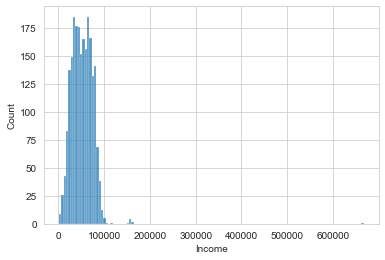

In [329]:
sns.histplot(data['Income'])

### Income
The US Boreau Of Labor Statistic show us the mean of anual incomes for employment (https://www.bls.gov/opub/ted/2015/occupational-employment-wages-2014.htm).
The mean anual income in year 2014 is : $30.879, so  
I will add a column (Group_income) that will segment income into quintiles. 

Income segmentation:

* Low Income <  $30.879
* Mid Income >= $30.879 & <= 50.000
* High Income > 50000

In [330]:
data['Group_income'] = ''

In [331]:
def income_seg(income):
    if income < 30870:
        return 'Low_income'
    elif 30870 <= income <= 50000:
        return 'Mid_income'
    else:
        return 'High_income'

data['Group_income'] = data[['Income']].apply(lambda x: income_seg(x['Income']), axis=1)

## EDA

#### Univariate analysis

In [397]:
#Function to plot histplot & boxplot in sample subplot and show the median and mean.
def box_hist_plt(data, feature, figsize=(10,10), kde=None):
    fig, (ax_box, ax_hist) = plt.subplots(
        nrows=2,
        sharex=True,  #equal x-axis to all plot
        gridspec_kw={"height_ratios": (0.20, 0.75)},
        figsize=figsize
        )
    
    #box
    sns.boxplot(data[feature], ax=ax_box, color='white')
    
    #median box
    ax_box.axvline(data[feature].median(), color='Green', linestyle='-')
    
    #mean box
    ax_box.axvline(data[feature].mean(), color='Red', linestyle='--')

    # hist
    sns.histplot(
        data=data, x=feature, ax=ax_hist
                        )
    #mean line
    ax_hist.axvline(
         data[feature].mean(), color='Red', linestyle='--'  
    )
    
    #median line
    ax_hist.axvline(
         data[feature].median(), color='Green', linestyle='-'
    )
    print('Mean {} | Median {} | Mode {} | std {}'.format(
            round(data[feature].mean(),2),
            round(data[feature].median(),2),
            sts.mode(data[feature]),
            round(np.std(data[feature]),2)
    ))

In [333]:
#Function to plot categorical variables + label and method True or False to see percentage or count.
def count_plot(feature, method):
    ax = data[feature].value_counts(ascending = True, normalize=method).plot.barh(figsize=(15,8))
    
    for annotate in ax.containers:
        a = ax.bar_label(annotate)


### 1 - Age

Mean 54.16 | Median 53.0 | Mode 47 | std 11.81


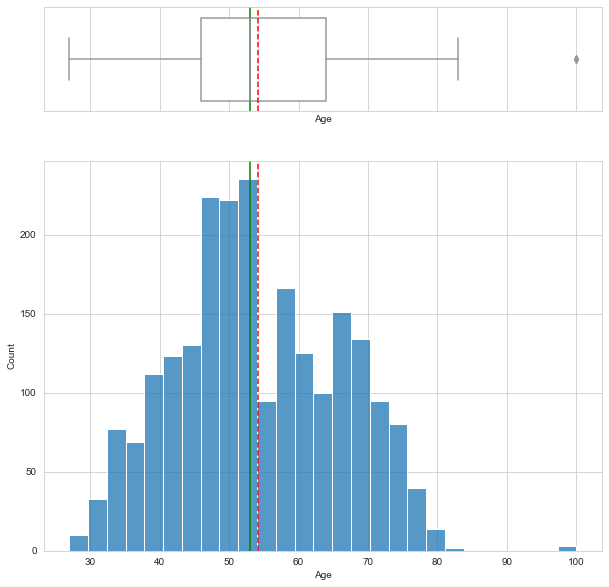

In [334]:
box_hist_plt(data, 'Age')

Observations: 
* The distribution of *Age* is almost Gaussian because the difference between value of mean and median is close to zero.
* Some Outliers in the axis x on the right (ax > 120).

#### 2 - Income

Mean 52247.25 | Median 51381.5 | Mode 7500.0 | std 25167.4


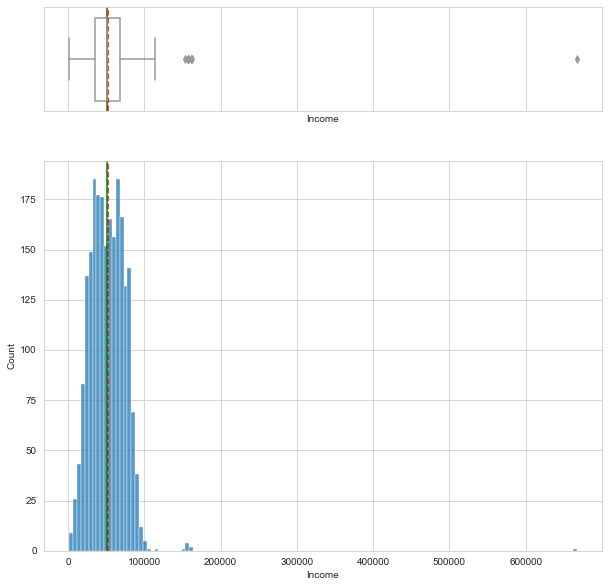

In [335]:
box_hist_plt(data, 'Income')

Observations: 
* Some outliers to the right.
* Max value (666.666) possibly it's a data entry error.

In [336]:
data[data['Income'] > 200000]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,A_Wines,A_Fruits,...,Response,Complain,Registration_year,Registration_quarter,Age,Age_Group,DayOfWeek,WeekOnMonth,Total_Spent,Group_income
527,1977,Graduation,Together,666666.0,1,0,2013-02-06,23,9,14,...,0,0,2013,1,46,46-59,2,1,62,High_income


In [337]:
data.drop(index=df_filtered[data['Income'] > 200000].index, inplace=True)

#### 3 - A_Fish

Mean 37.54 | Median 12.0 | Mode 0 | std 54.63


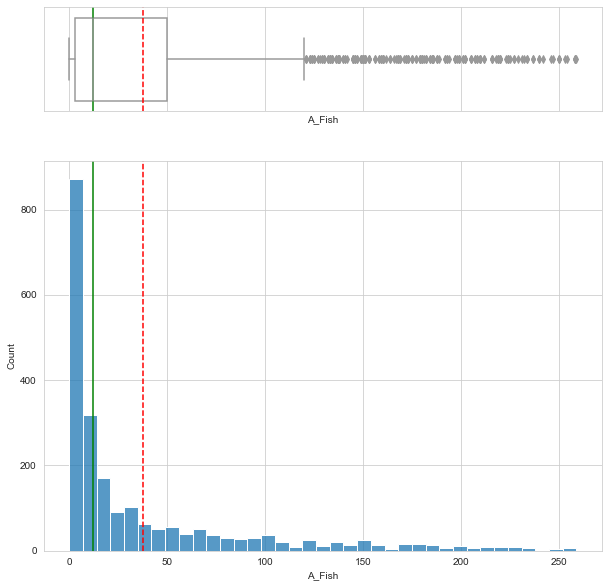

In [338]:
box_hist_plt(data, 'A_Fish')

Observations: 
* The distribution is very skewed on the right. 
* We don't remove the points in the boxplot represent "outliers", because this is a tendency on real world, some people spend more money in Fish Products that Vegetal Products.
* In order to establish a maximum value, we will top limit in purchases greater than 250 on AX.

In [339]:
data[data['A_Fish'] > 250]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,A_Wines,A_Fruits,...,Response,Complain,Registration_year,Registration_quarter,Age,Age_Group,DayOfWeek,WeekOnMonth,Total_Spent,Group_income
169,1961,Master,Single,59184.0,0,1,2012-09-09,6,341,142,...,0,0,2012,3,62,60+,6,2,1072,High_income
607,1956,Master,Married,90226.0,0,0,2012-09-26,26,1083,108,...,0,0,2012,3,67,60+,2,4,2352,High_income
614,1981,Master,Together,75774.0,1,0,2014-02-05,27,340,21,...,0,0,2014,1,42,31-45,2,1,823,High_income
615,1981,Master,Together,75774.0,1,0,2014-02-05,27,340,21,...,0,0,2014,1,42,31-45,2,1,823,High_income
1503,1985,Graduation,Married,70951.0,0,0,2013-04-05,66,239,10,...,0,0,2013,2,38,31-45,4,1,1198,High_income
1938,1951,Master,Single,73705.0,0,2,2014-05-03,86,612,91,...,0,0,2014,2,72,60+,5,1,1695,High_income


In [340]:
data['A_Fish'].clip(upper=250, inplace=True)

#### 4 | A_Wines

Mean 304.07 | Median 174.0 | Mode 2 | std 336.54


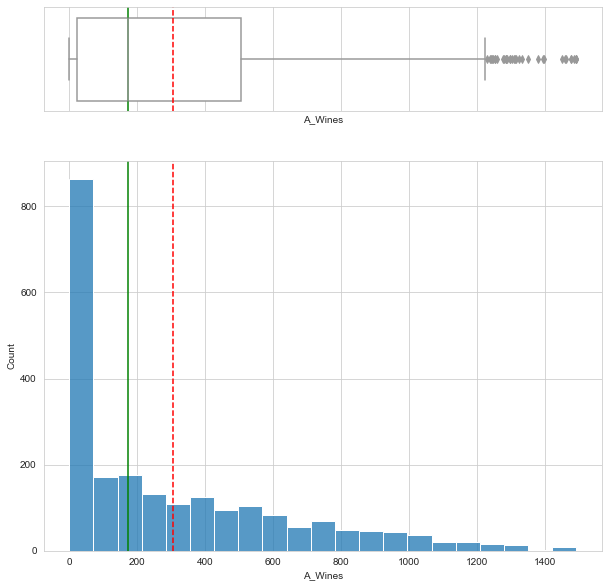

In [341]:
box_hist_plt(data,'A_Wines')

Observations: 
* The distribution is very skewed on the right. 
* The median is lower than 200, that is to say, more than 50% of the clients have spent less than 200 in wines.
* Outliers are observed after 1200 values, it may be due to promotions or variables exogenous to the data set, but I would like to know their marital status, group income and how old they are, before starting treatment.

In [342]:
data[data['A_Wines'] >= 1200].groupby(['Group_income','Marital_Status','Age_Group']).size().reset_index(name='Count')

,Group_income,Marital_Status,Age_Group,Count
0,High_income,Divorced,46-59,2
1,High_income,Divorced,60+,1
2,High_income,Married,31-45,4
3,High_income,Married,46-59,5
4,High_income,Married,60+,10
5,High_income,Single,31-45,2
6,High_income,Single,46-59,3
7,High_income,Single,60+,4
8,High_income,Together,31-45,3
9,High_income,Together,46-59,3


The Age_Grou

##### Understanding distributions before treatment

<AxesSubplot:xlabel='Group_income,Marital_Status'>

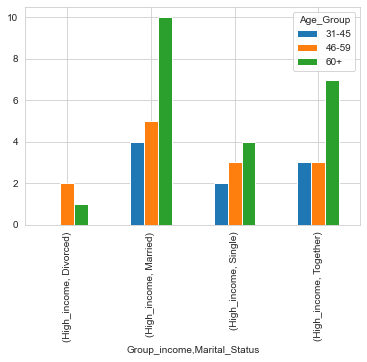

In [343]:
# Barplot for groups
sns.set_style('whitegrid')
data[data['A_Wines'] >= 1200].groupby(['Group_income','Marital_Status','Age_Group']).size().unstack().plot.bar()

No treatment required, the values trend is similar to data transactions in real life.

### 5 - A_Fruits

Mean 26.31 | Median 8.0 | Mode 0 | std 39.77


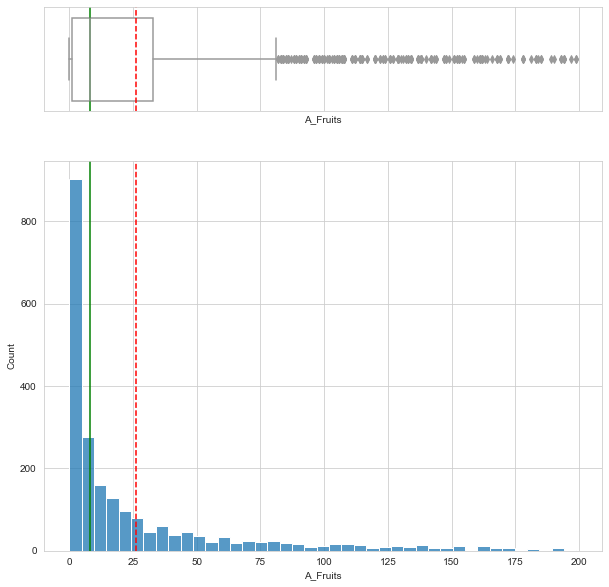

In [344]:
box_hist_plt(data,'A_Fruits')

Observations: 
* The distribution is very skewed on the right. 
* The median is 8, that its to say, 50% of customers spent between 0 or 8 in Fruits.
* There are some outliers after the trend cut (<175). We will set a lower high at 180 in order to maintain the trend.

In [345]:
data[data['A_Fruits'] >= 175]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,A_Wines,A_Fruits,...,Response,Complain,Registration_year,Registration_quarter,Age,Age_Group,DayOfWeek,WeekOnMonth,Total_Spent,Group_income
101,1982,Graduation,Married,63211.0,0,0,2012-02-11,3,145,193,...,1,0,2012,1,41,31-45,5,2,1173,High_income
335,1983,Graduation,Together,78687.0,0,0,2012-09-08,13,817,185,...,1,0,2012,3,40,31-45,5,2,2130,High_income
426,1960,Master,Married,89058.0,0,0,2012-07-12,18,454,194,...,0,0,2012,3,63,60+,3,2,850,High_income
434,1966,Graduation,Single,79946.0,0,0,2014-12-05,19,395,183,...,0,0,2014,4,57,46-59,4,1,1478,High_income
441,1971,PhD,Married,78931.0,0,0,2013-10-25,19,331,197,...,0,0,2013,4,52,46-59,4,4,943,High_income
444,1990,Graduation,Single,64509.0,0,0,2013-08-17,19,836,185,...,1,0,2013,3,33,31-45,5,3,1722,High_income
465,1969,Graduation,Married,80952.0,0,0,2013-02-28,20,778,178,...,1,0,2013,1,54,46-59,3,4,1757,High_income
469,1954,Graduation,Married,86718.0,0,0,2013-01-17,20,344,189,...,0,0,2013,1,69,60+,3,3,1270,High_income
583,1979,Graduation,Single,60474.0,0,1,2013-01-04,25,265,199,...,0,0,2013,1,44,31-45,4,1,1180,High_income
584,1979,Graduation,Single,60474.0,0,1,2013-01-04,25,265,199,...,0,0,2013,1,44,31-45,4,1,1180,High_income


In [346]:
data['A_Fruits'].clip(upper=180, inplace=True)

### 6 - A_Meat

Mean 167.02 | Median 67.0 | Mode 7 | std 225.69


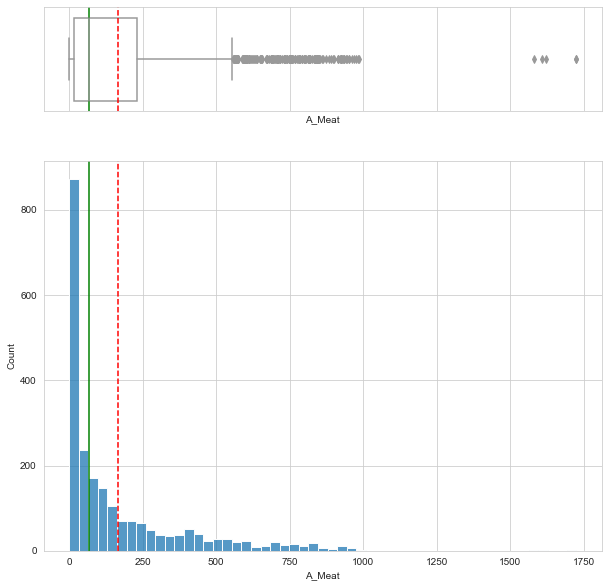

In [347]:
box_hist_plt(data,'A_Meat')

Observations: 
* The distribution is skewed on the right. 
* The median is 67, that its to say, 50% of customers spent between 0 and 67 in Meats products.
* There are some outliers after the trend cut (>1000). We will set a lower high at 1000 in order to maintain the trend.

In [348]:
data['A_Meat'] = data['A_Meat'].clip(upper=1000, inplace=True)

### 7 - A_Fish

Mean 37.52 | Median 12.0 | Mode 0 | std 54.55


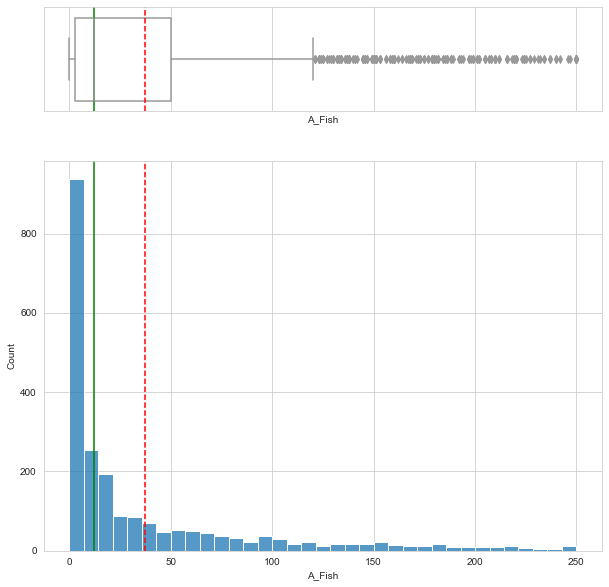

In [349]:
box_hist_plt(data,'A_Fish')

Observations: 
* The distribution is skewed on the right. 
* The median is 12, that its to say, 50% of customers spent between 0 and 12 in Fish products.
* There are some outliers after the trend cut (>220), but this its product of customers with *High_income* and this is possible in market trends, so not treatment require.

### 8 - A_Sweet

Mean 27.07 | Median 8.0 | Mode 0 | std 41.28


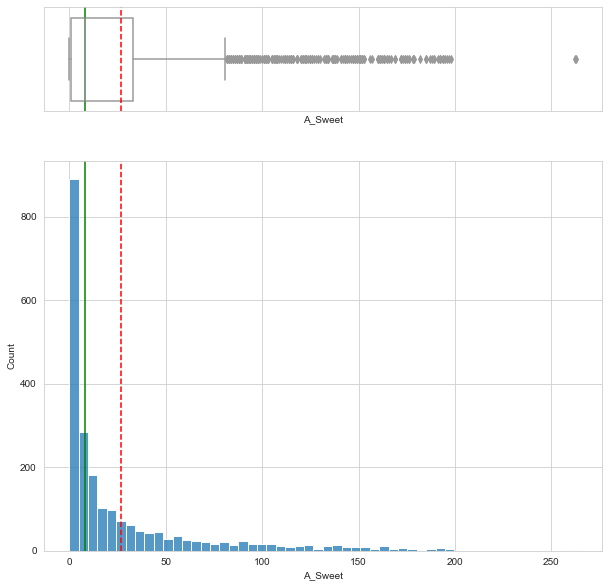

In [350]:
box_hist_plt(data,'A_Sweet')

Observations: 
* The distribution is skewed on the right. 
* The median is 8, that its to say, 50% of customers spent between 0 and 8 in Sweet products.
* There are some outliers after the trend cut (>200). We will set a lower high at 200 in order to maintain the trend.

In [351]:
data['A_Sweet'] = data['A_Sweet'].clip(upper=200, inplace=True)

### 9 - A_Gold

Mean 44.04 | Median 24.0 | Mode 1 | std 52.16


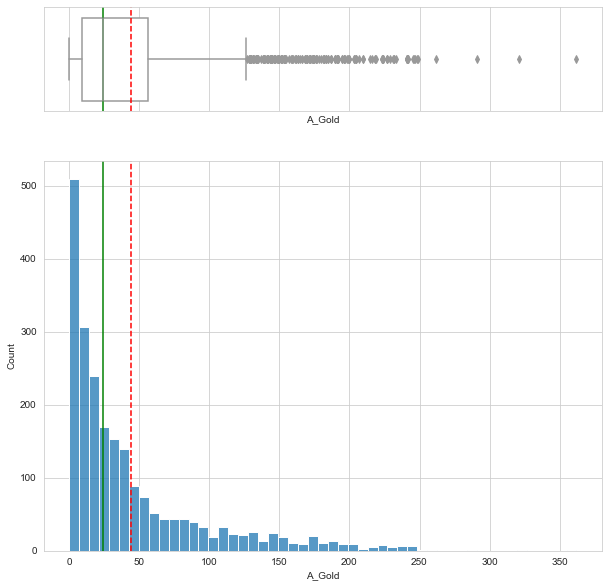

In [352]:
box_hist_plt(data,'A_Gold')

Observations: 
* The distribution is skewed. 
* The median is 24, that its to say, 50% of customers spent between 0 and 24 in Gold products.
* There are some outliers after the trend cut (>250). We will set a lower high at 250 in order to maintain the trend.

In [353]:
data['A_Gold'] = data['A_Gold'].clip(upper=250, inplace=True)

### 10 - P_Deals

Mean 2.32 | Median 2.0 | Mode 1 | std 1.93


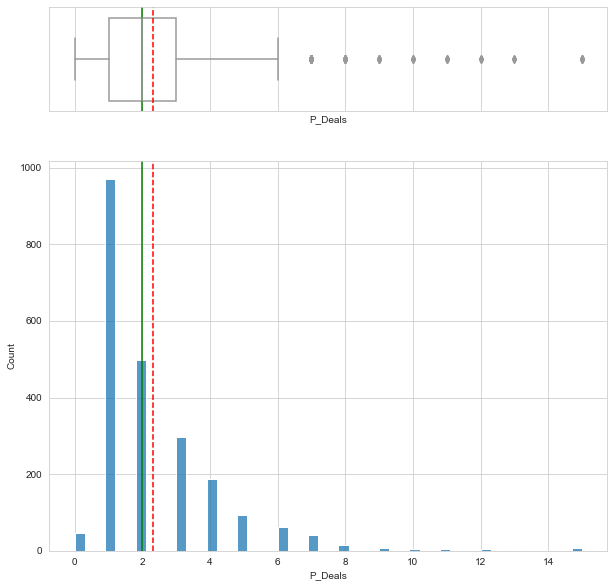

In [354]:
box_hist_plt(data,'P_Deals')

Observations: 
* The distribution is skewed on the right. 
* The median is 2, that its to say, 50% of customers spent between 0 and 2 in Deals purchases.
* Especially in this variables, i will not considerate outliers, because customers can buy atypically based on the discounts offered. 

### 11 - P_Digital

Mean 4.09 | Median 4.0 | Mode 2 | std 2.78


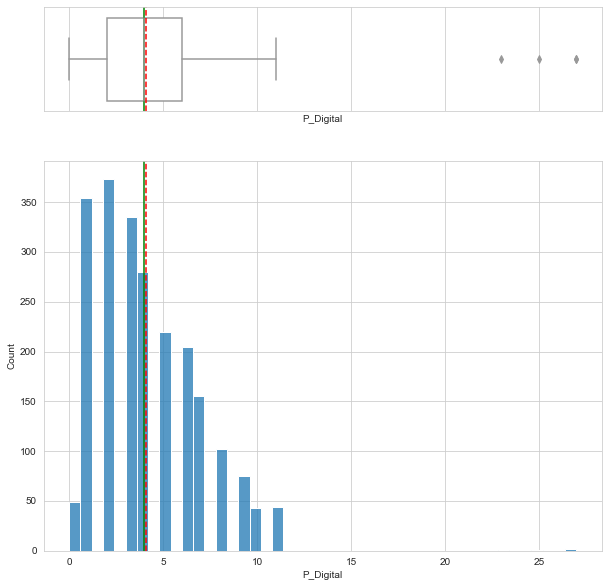

In [355]:
box_hist_plt(data,'P_Digital')

In [356]:
def normal_test(column):
        statistics, pval = stats.normaltest(data['P_Digital'])
        probplot = stats.probplot(data[column], plot=plt)
        if(pval > 0.05):
            print('Column {} follows a normal distribution {}'.format(
                column,
                pval
            ))
        elif (pval < 0.05):
            print('Column {} does not follow a normal distribution {}'.format(
                column,
                pval
            )) 
        return probplot

Column P_Digital does not follow a normal distribution 5.879821915004624e-153


((array([-3.42312238, -3.17416969, -3.03620446, ...,  3.03620446,
          3.17416969,  3.42312238]),
  array([ 0,  0,  0, ..., 25, 27, 27], dtype=int64)),
 (2.6354169195520103, 4.085305940151853, 0.9471677458868614))

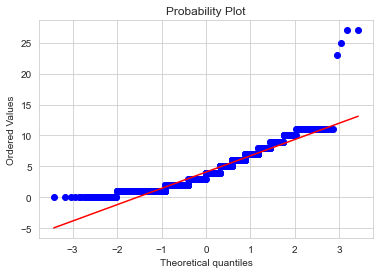

In [357]:
normal_test('P_Digital')

Observations: 

* Fairly skewed for the right. 
* The median is 4.0, it's to say, 50 percent of customers make 0-4 digital purchases.
* The variable P_Digital does not follow a normal distribution.
* They´re a some outliers after 3 sigmas, i'll treat them.

In [358]:
data['P_Digital'].clip(upper=20, inplace=True)

### 12 - P_Delivered_Shipping

Mean 2.66 | Median 2.0 | Mode 0 | std 2.92


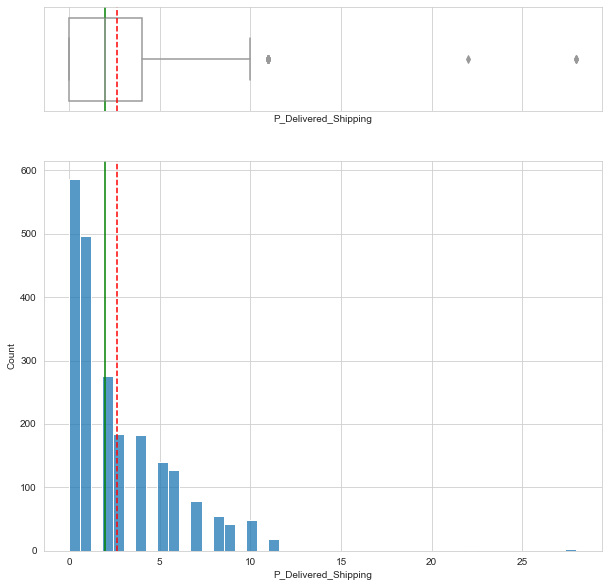

In [359]:
box_hist_plt(data,'P_Delivered_Shipping')

Column P_Delivered_Shipping does not follow a normal distribution 2.0570710827674813e-72


((array([-3.42312238, -3.17416969, -3.03620446, ...,  3.03620446,
          3.17416969,  3.42312238]),
  array([ 0,  0,  0, ..., 28, 28, 28], dtype=int64)),
 (2.6410537349530174, 2.6627958910227774, 0.9023426643440887))

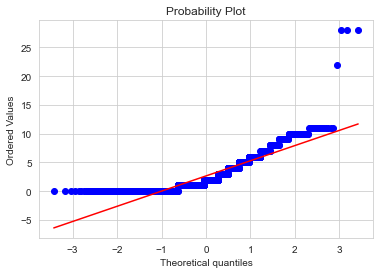

In [360]:
normal_test('P_Delivered_Shipping')

Observations: 

* Skewed for the right. 
* The median is 2, it's to say, 50 percent of customers make 0-2 delivered by shipping.
* The variable P_Delivered_Shipping does not follow a normal distribution.
* They´re a some outliers after 3 sigmas, i'll treat them.

In [361]:
data['P_Delivered_Shipping'].clip(upper=13, inplace=True)

### 13 - P_NonDigital

Mean 5.79 | Median 5.0 | Mode 3 | std 3.25


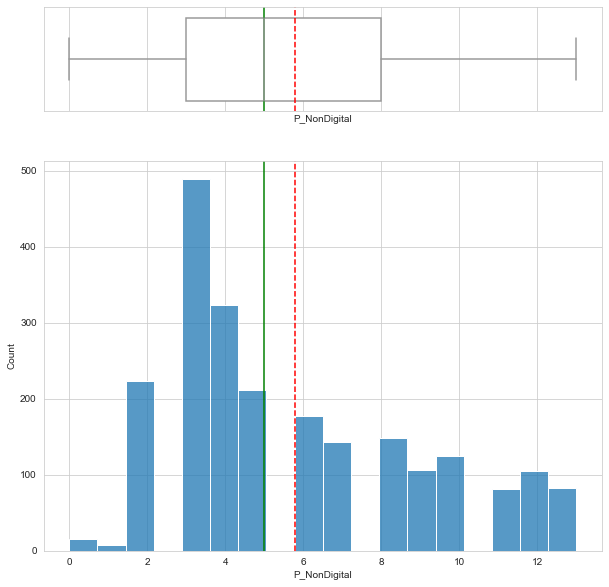

In [362]:
box_hist_plt(data,'P_NonDigital')

Column P_NonDigital does not follow a normal distribution 2.0570710827674813e-72


((array([-3.42312238, -3.17416969, -3.03620446, ...,  3.03620446,
          3.17416969,  3.42312238]),
  array([ 0,  0,  0, ..., 13, 13, 13], dtype=int64)),
 (3.096921894480012, 5.791424743188923, 0.9514741896903928))

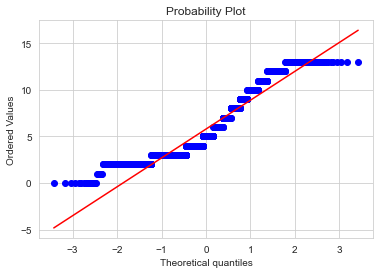

In [363]:
normal_test('P_NonDigital')

Observations: 

* Skewed for the right. 
* The median is 5, it's to say, 50 percent of customers make 0-2 purchases on the stores.
* The variable P_NonDigital does not follow a normal distribution.
* Outliers detected: 0.

### 14 - Qty_Visit_Web

Mean 5.32 | Median 6.0 | Mode 7 | std 2.43


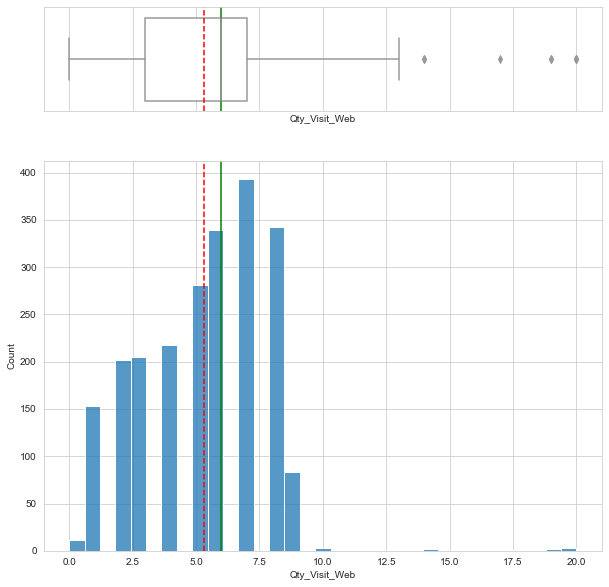

In [364]:
box_hist_plt(data,'Qty_Visit_Web')

Column Qty_Visit_Web does not follow a normal distribution 2.0570710827674813e-72


((array([-3.42312238, -3.17416969, -3.03620446, ...,  3.03620446,
          3.17416969,  3.42312238]),
  array([ 0,  0,  0, ..., 20, 20, 20], dtype=int64)),
 (2.3427111560976632, 5.316212594908441, 0.9641105791250942))

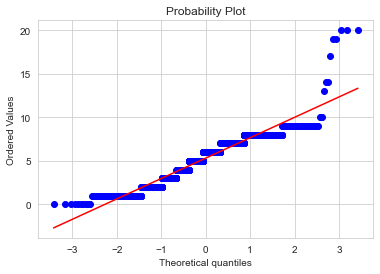

In [365]:
normal_test('Qty_Visit_Web')

Observations: 

* Almost skewed for the right. 
* The median is 6, it's to say, 50 percent of customers make 0-6 visits on web.
* The variable Qty_Visit_Web does not follow a normal distribution.
* They're some outliers after 12.5 values but i'll not treat since it is possible to visit a website many times to lower barriers of indecision about a certain campaign or offer.

### 15 - Complain

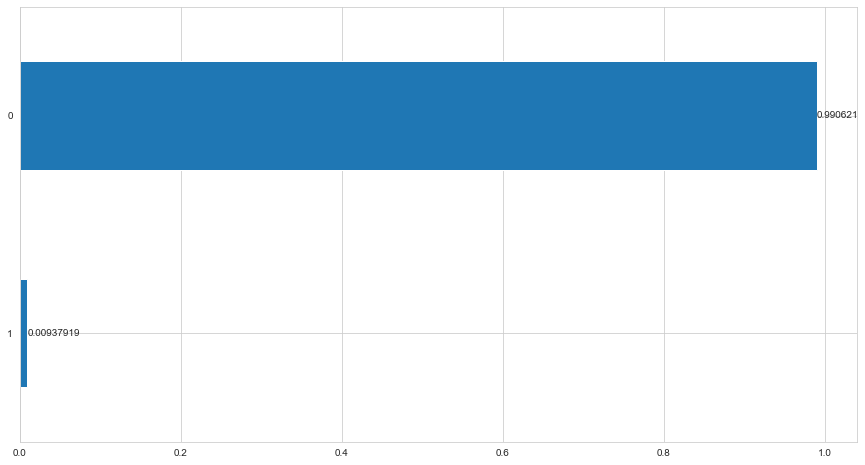

In [366]:
count_plot('Complain', True)

Observations: 
* 99% of customers have not complained in the last 2 years, in real world this is inexistent, since the average nps for a retail is in the range of 30 - 35.

### 16 - Age_Group

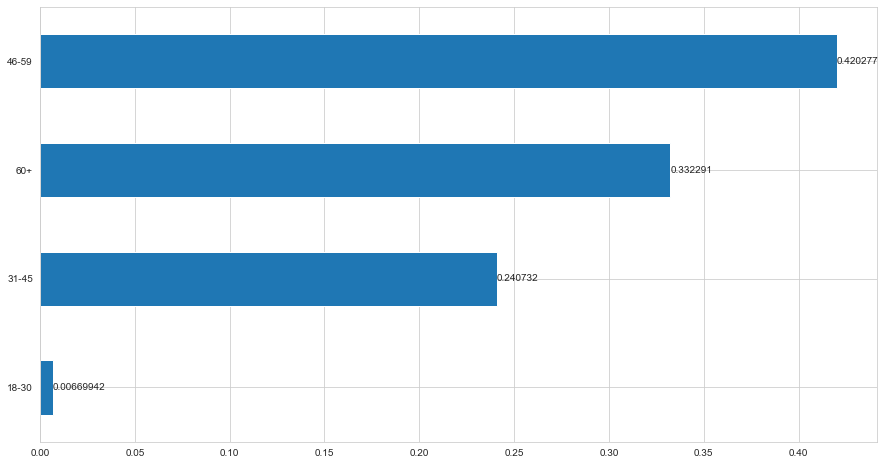

In [367]:
count_plot('Age_Group', True)

Observations:
* The age range 46-59 predominates in ~42%.
* The range of 18-30 years, almost non-existent.
* Offer campaigns should be centralized in the 31 to 60+ segment..


### 17 - Group Income

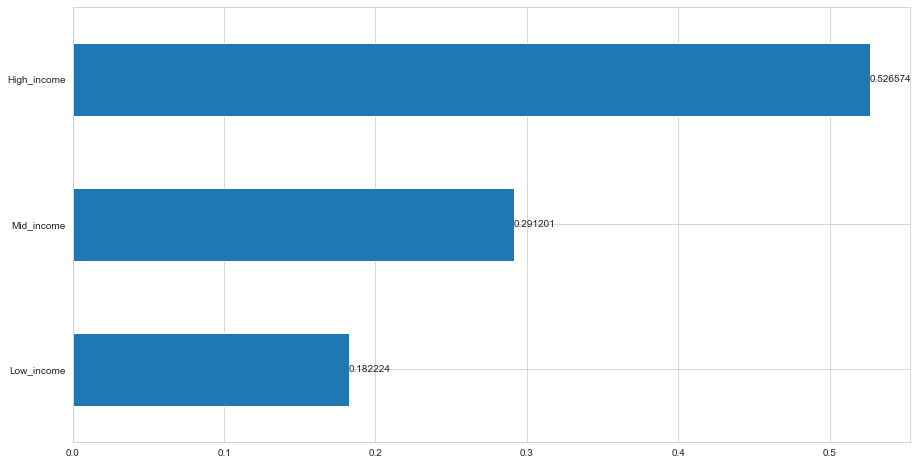

In [368]:
count_plot('Group_income', True)

Observations:
* More than 52% of the clients have income greater than 50,000 dollars. In multivariate analysis we will see if said segment is the one with the most acceptance of offers.

### 18 - DayOfWeek

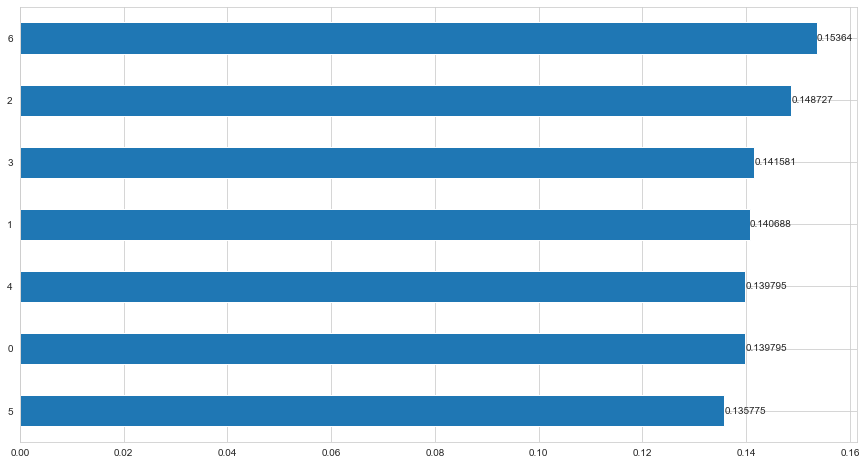

In [369]:
count_plot('DayOfWeek', True)

Observations:
* No specific day is observed with broad dominance.
* The distribution is almost congruent.

### 19 - WeekOnMonth

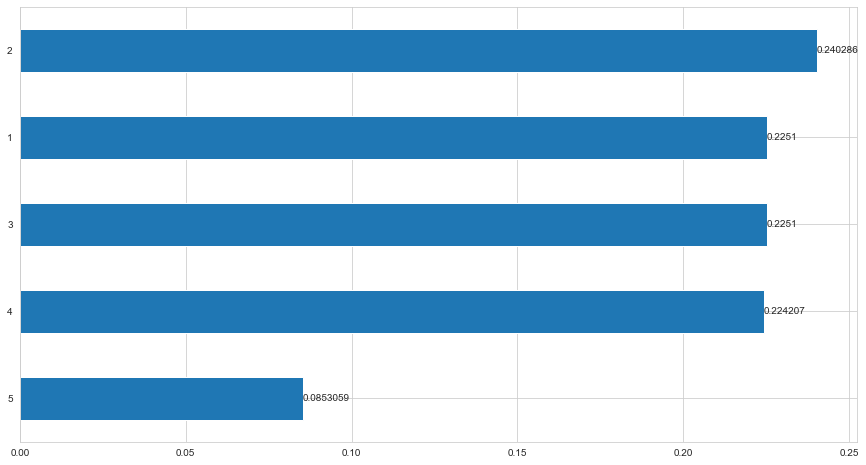

In [370]:
count_plot('WeekOnMonth', True)

Observations: 
* No marked predominance of a week in the specific month is observed, however week 2 in the month has a predominance of 1.5% over weeks 1, 3 and 4.
* Congruent distribution.

### 20 - Total_Spent 

Mean 606.04 | Median 396.0 | Mode 46 | std 602.14


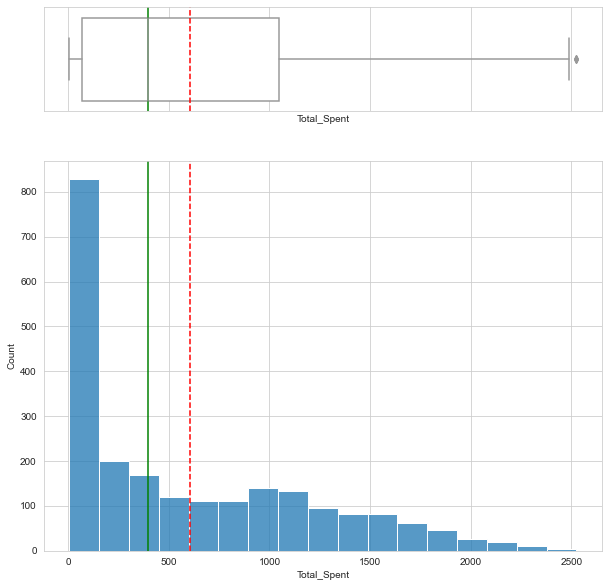

In [371]:
box_hist_plt(data,'Total_Spent')

Column Total_Spent does not follow a normal distribution 2.0570710827674813e-72


((array([-3.42312238, -3.17416969, -3.03620446, ...,  3.03620446,
          3.17416969,  3.42312238]),
  array([   5,    6,    6, ..., 2524, 2525, 2525], dtype=int64)),
 (560.9273999383612, 606.0410897722196, 0.9302852503437263))

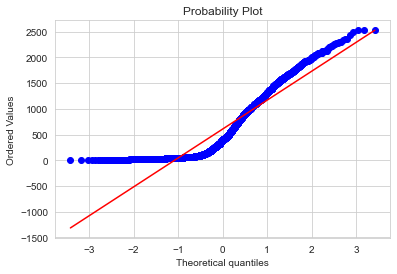

In [372]:
normal_test('Total_Spent')

Observations: 
* More than 50% of clients spend less than 500.
* In the multivariate analysis, we will see what type of customers they are, since they represent more than 1/3 of the income obtained.
* Total_Spent does not follow a normal distribution
* Fairly skewed for the right.

### 21 | Recency

Mean 49.12 | Median 49.0 | Mode 56 | std 28.96


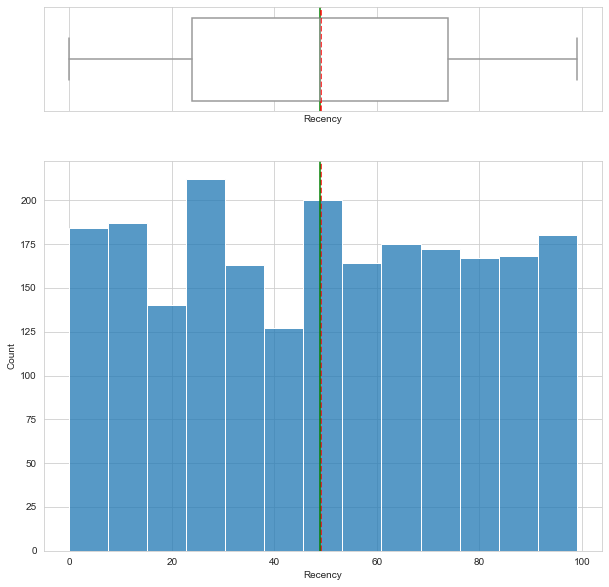

In [373]:
box_hist_plt(data,'Recency')

Column Recency does not follow a normal distribution 2.0570710827674813e-72


((array([-3.42312238, -3.17416969, -3.03620446, ...,  3.03620446,
          3.17416969,  3.42312238]),
  array([ 0,  0,  0, ..., 99, 99, 99], dtype=int64)),
 (28.337465445572583, 49.12103617686466, 0.9772623902383322))

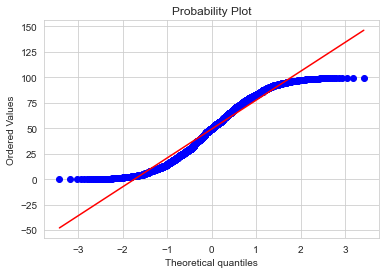

In [374]:
normal_test('Recency')

Observations: 
* The variable has a nearly normal distribution.
* Not outliers observed.
* 50% of clients have a recency between 0 to 49 days.

### 22 | Response (Target)


Mean 0.15 | Median 0.0 | Mode 0 | std 0.36


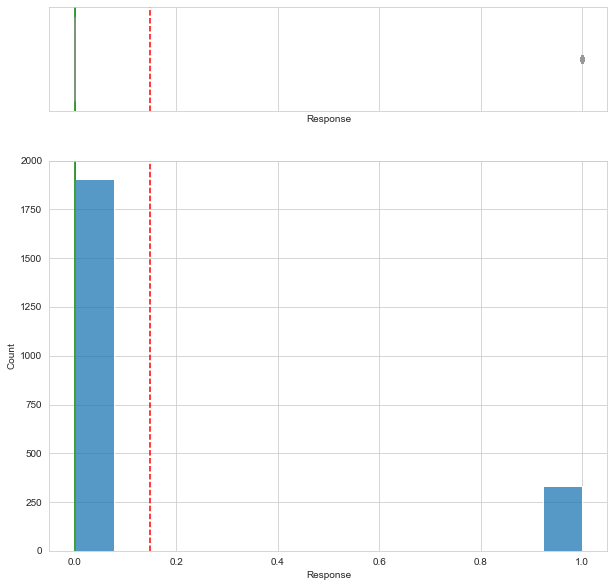

In [375]:
box_hist_plt(data,'Response')

In [376]:
data['Response'].value_counts()

0    1905
1     334
Name: Response, dtype: int64

Observations: 

* Approx 85% customer's response was NO in the last campaign.
* The plot shows us that there is an imbalance in the target class.


## Bivariate Analysis

### 23 - Correlation

<AxesSubplot:>

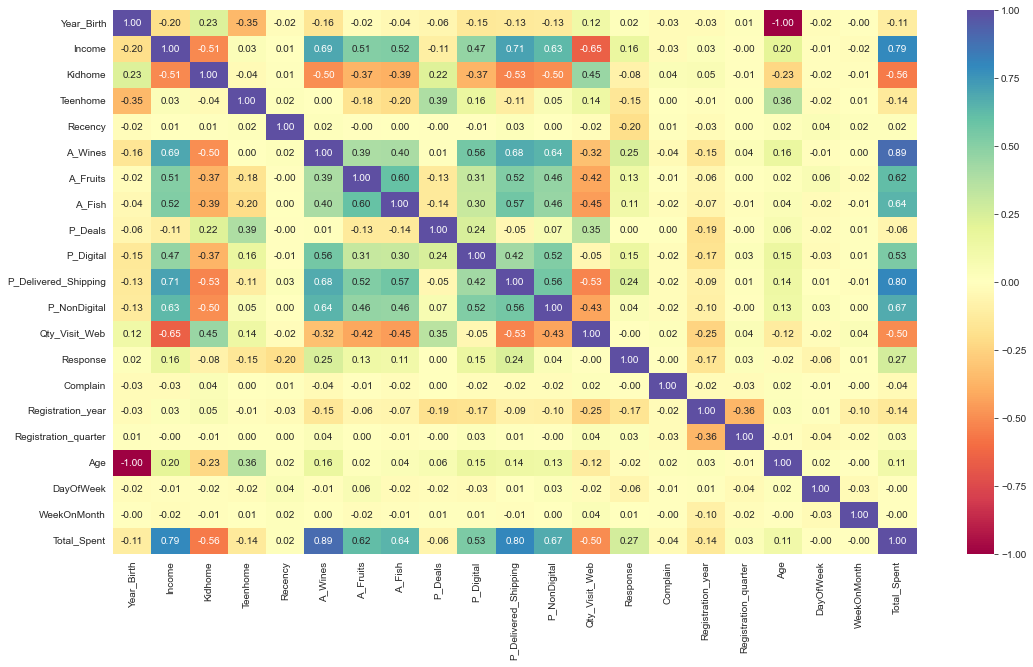

In [377]:
corr = data.corr()
plt.figure(figsize=(18, 10))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap='Spectral')


Observations: 



* The number of web visits is related to the number of non-adolescent children, that is, the number of web visits could increase if the client has a non-adolescent child.
* Low correlation in the target variable with 'A_Wines', that is, there is a probability that people who consume wines will accept the offer of a campaign.
* Semi-high correlation in customers who consume fish and fruit.
* Low average correlativity that people who have teenhome, use discounts.
* Low correlation between Response and P_Delivered_Shipping variables.

### 24 - Response analysis (target)

In [378]:
data.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'A_Wines', 'A_Fruits', 'A_Meat',
       'A_Fish', 'A_Sweet', 'A_Gold', 'P_Deals', 'P_Digital',
       'P_Delivered_Shipping', 'P_NonDigital', 'Qty_Visit_Web', 'Response',
       'Complain', 'Registration_year', 'Registration_quarter', 'Age',
       'Age_Group', 'DayOfWeek', 'WeekOnMonth', 'Total_Spent', 'Group_income'],
      dtype='object')

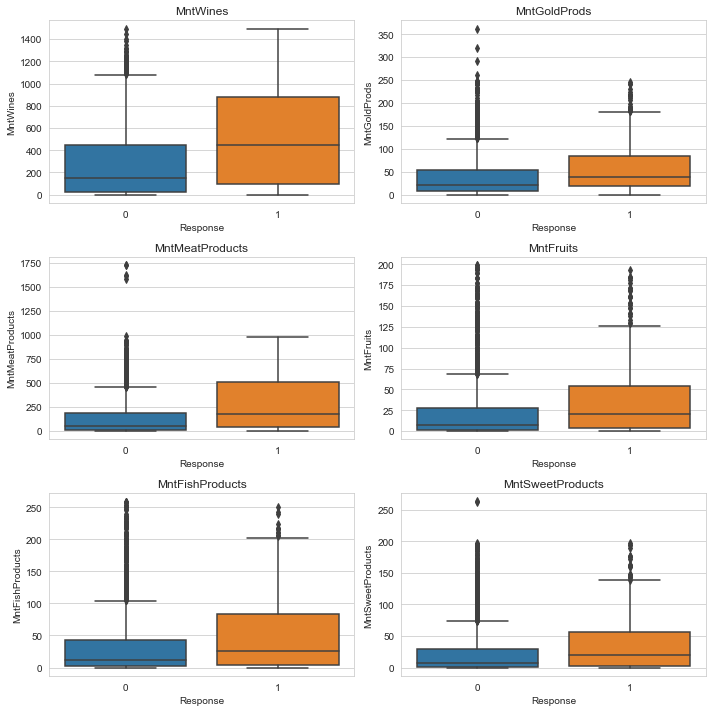

In [379]:
cols = df_raw[
    [
        "MntWines",
        "MntGoldProds",
        "MntMeatProducts",
        "MntFruits",
        "MntFishProducts",
        "MntSweetProducts",
    ]
].columns.tolist()
plt.figure(figsize=(10, 10))

for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(df_raw["Response"], df_raw[variable])
    plt.tight_layout()
    plt.title(variable)
plt.show()

Observations:
* Each plot of the graph above shows that each customer who spends more on the product accepts the offer, that is, if a customer spends more on wine, they will accept the wine offer.

#### 24.2 - Total Spent

<AxesSubplot:xlabel='Registration_year,Registration_quarter'>

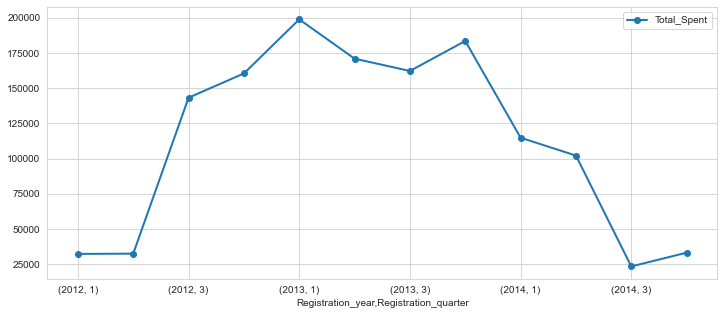

In [380]:
pd.pivot_table(
    data=data,
    index=["Registration_year", 'Registration_quarter'],
    values="Total_Spent",
    aggfunc=np.sum,
).plot(kind="line", marker='o', linewidth=2, figsize=(12, 5))

Observations: 
* Sales after Q3 2013 have dropped drastically.
* Max point in Q1 2013.


### 24.3 - Customers behaviour (Accept the offer).

#### Quarters

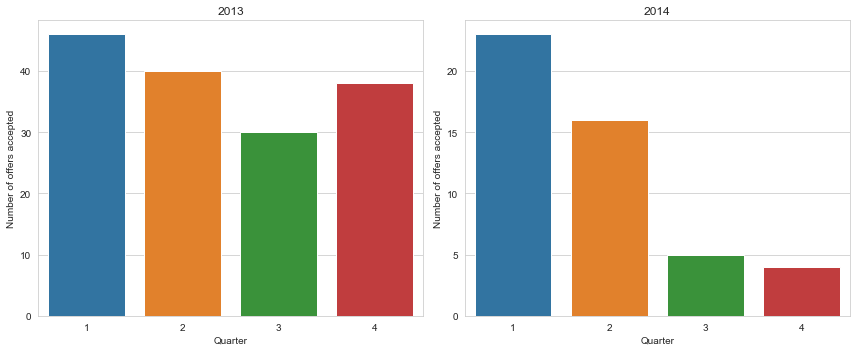

In [381]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))


for i, year in enumerate([2013, 2014]):
    
    year_data = data[data['Registration_year'] == year]
    
    count = year_data[year_data['Response']==1].groupby('Registration_quarter')['Response'].count().reset_index()


    # Bar graphic
    sns.barplot(data = count, x='Registration_quarter', y='Response', ax=axes[i])
    axes[i].set_title(str(year))
    axes[i].set_xlabel('Quarter')
    axes[i].set_ylabel('Number of offers accepted')
    


    # show % on bars
   # for index, row in count.iterrows():
      #  axes[i].text(row.name, row.Percentage, f"{row.Percentage:.1f}%", 
        #             color='black', ha="center", va="bottom")

plt.tight_layout()
plt.show()

Observations:
* In the year 2013, the customers accepts more offers in Q1 and Q2.
* Same in the year 2014, with the difference that their accepted offers in Q3 and Q4 drop extremely while in 2013 they remain consistent.

#### Understanding the variations of Q

In [382]:
q3_q4_2014 = data[(data['Registration_quarter'] > 2) & (data['Response']) & (data['Registration_year'] == 2014)]
q1_q2_2014 = data[(data['Registration_quarter'] < 3) & (data['Response']) & (data['Registration_year'] == 2014)]

### 24.4 - Qty of Purchases with deals

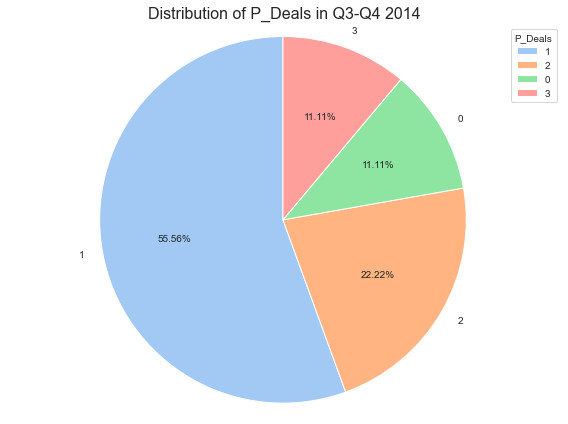

In [383]:
colors = sns.color_palette('pastel')[0:5]
value_counts_q3_q_4 = q3_q4_2014['P_Deals'].value_counts()

# Pie chart
plt.figure(figsize=(8, 6))
plt.pie(value_counts_q3_q_4.values, colors=colors, labels=value_counts_q3_q_4.index, autopct='%.2f%%',
        startangle=90, wedgeprops={'linewidth': 1, 'edgecolor': 'white'})


plt.title('Distribution of P_Deals in Q3-Q4 2014', fontsize=16)
plt.legend(title='P_Deals', loc='best')


plt.axis('equal')
plt.tight_layout()
plt.show()

In [384]:
print('Number of purchases made with discounts in Q3 and Q4 2014: {}'.format(
        value_counts_q3_q_4.sum())
                                    )

Number of purchases made with discounts in Q3 and Q4 2014: 9


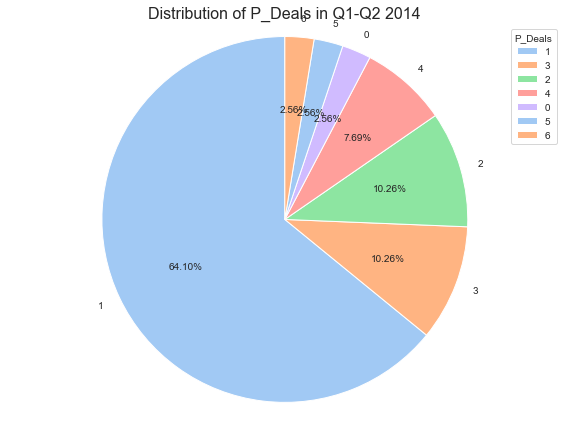

In [385]:
colors = sns.color_palette('pastel')[0:5]
value_counts_q1_q2 = q1_q2_2014['P_Deals'].value_counts()

# Pie chart
plt.figure(figsize=(8, 6))
plt.pie(value_counts_q1_q2.values, colors=colors, labels=value_counts_q1_q2.index, autopct='%.2f%%',
        startangle=90, wedgeprops={'linewidth': 1, 'edgecolor': 'white'})


plt.title('Distribution of P_Deals in Q1-Q2 2014', fontsize=16)
plt.legend(title='P_Deals', loc='best')


plt.axis('equal')
plt.tight_layout()
plt.show()

In [386]:
print('Number of purchases made with discounts in Q1 and Q2 2014: {}'.format(value_counts_q1_q2.sum())
                                    )

Number of purchases made with discounts in Q1 and Q2 2014: 39


Observations: 
* In the first semester of 2014, there are more purchases with discounts than in the remaining semester.
* In semester one, 39 discounted purchases were made, 433% more than in the second semester (9).

### 24.5 - Response for day of week

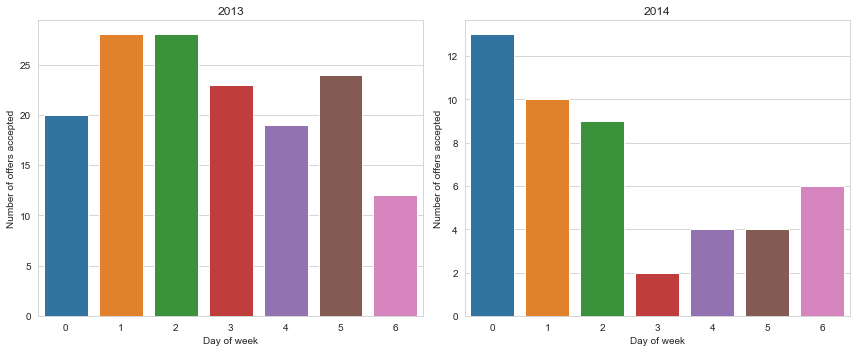

In [387]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))


for i, year in enumerate([2013, 2014]):
    
    year_data = data[data['Registration_year'] == year]
    
    count = year_data[year_data['Response']==1].groupby('DayOfWeek')['Response'].count().reset_index()
    
    # Bar graphic
    sns.barplot(data = count, x='DayOfWeek', y='Response', ax=axes[i])
    axes[i].set_title(str(year))
    axes[i].set_xlabel('Day of week')
    axes[i].set_ylabel('Number of offers accepted')

plt.tight_layout()
plt.show()

Observations: 
* There is an approximate difference of 54% less acceptance in the first 3 days of the week (Monday, Tuesday and Wednesday) for the year 2014, compared to the year 2013.
* The number of offers accepted decreases after Wednesday and returns to have a high trend until reaching Sunday, in the year 2014.
* In order to compare, you should see how many campaigns are sent before the middle of the week and how many after the middle of the week and what is communicated.

### 24.6 - Response impact by Recency, Age, Income and Total_Spent 

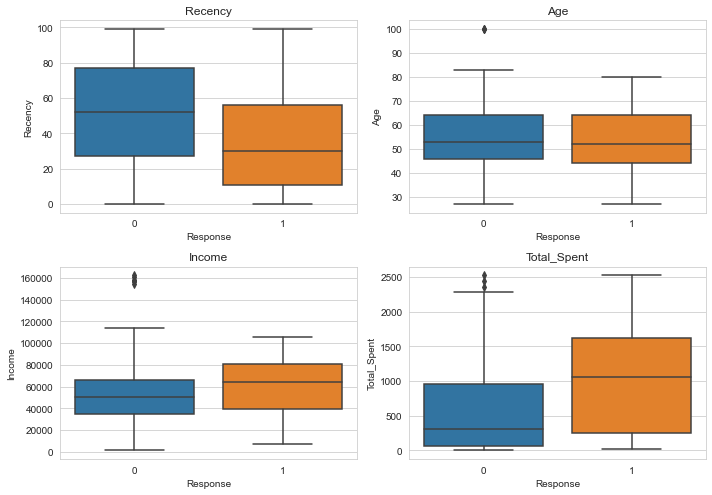

In [388]:
cols = data[["Recency", "Age", "Income", "Total_Spent"]].columns.tolist()
plt.figure(figsize=(10, 10))

for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(data["Response"], data[variable])
    plt.tight_layout()
    plt.title(variable)
plt.show()

Observations: 
* If the recency is low, the greater the probability of accepting an offer could be.
* Age does not impact on the acceptance of offers
* If the client spends more, there is more probability of accepting an offer.
* Customers with higher incomes tend to accept more offers.

### 24.7 - Response and Education

In [398]:
# function to stack on the same bar, response values against variables to a categorical variable.
def grouped_bars(df, independent, target):
    
    cross = pd.crosstab(df[independent], df[target])
    normalized_cross = cross.div(cross.sum(axis=1), axis=0)

    # Create stacked bars
    ax = normalized_cross.plot(kind="bar", stacked=True)

    # Range 
    ax.set_ylim(0, 1)

    # Add legends and title
    plt.xlabel(independent)
    plt.ylabel(target)
    plt.title('Stacked Bar Chart')
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    # Show
    plt.show()


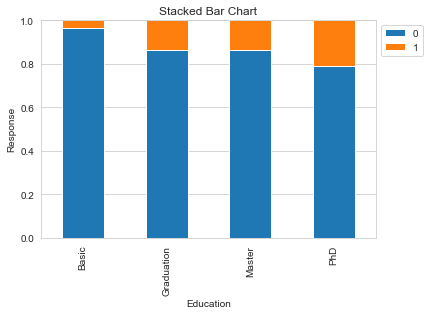

In [390]:
grouped_bars(data, 'Education', 'Response')

Observations: 
* As clients advance in their level of education, more accept offers.

### 24.8 - Response and Marital Status

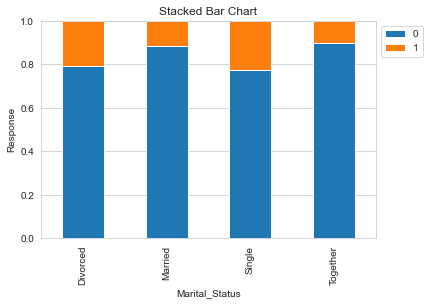

In [391]:
grouped_bars(data, 'Marital_Status', 'Response')

Observations:
* Single and divorced customers are more likely to accept offers.

### 24.9 - Response and Kidhome

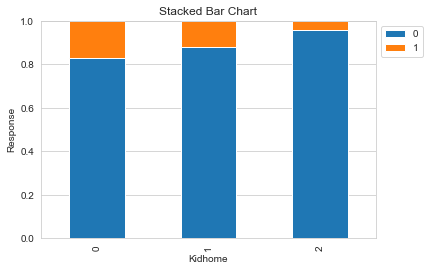

In [392]:
grouped_bars(data, 'Kidhome', 'Response')

Observations: 
* Customers without kidhome's tend to accept more offers.

### 24.a - Response and Teenhome

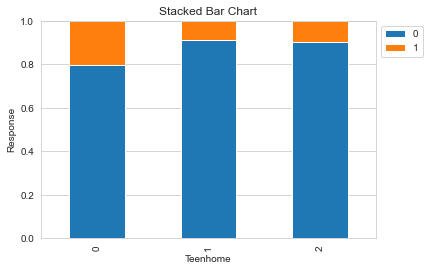

In [393]:
grouped_bars(data, 'Teenhome', 'Response')

Observations:
* Clients without teenhome's tend to accept more offers.

### 24.b - Response for Group Income

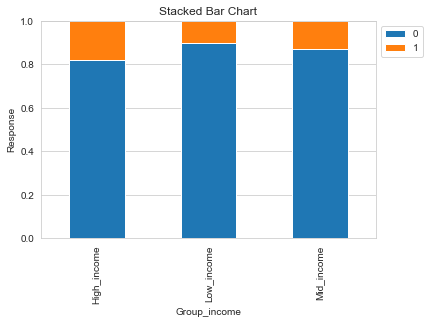

In [394]:
grouped_bars(data, 'Group_income', 'Response')

Observations:
* As expected, the people with the highest income are the ones who take the most offers.

Others general remarks on the *Response* variable: 

* The amounts spent in 2014 above $2,000 are made from Tuesday to Friday, while in 2013, it is exceeded from Monday to Sunday.
* In the year 2013, the amounts spent increased from Monday to Sunday, being the weekend where the most money was spent by customers.
* In the year 2014 this is completely the other way around, the downward trend from Monday to Sunday.
* In the year 2013, more offers were accepted per day than in 2014.
* The day of greatest acceptance of offers in 2014 is Monday.
* In the year 2013, the number of accepted offers gradually decreases from Tuesday to Sunday.
* In the year 2014, the acceptance of offers gradually decreases from Monday to Wednesday, falling to its minimum peak on Thursday, then increasing again from Friday to Sunday.
* In 2013, campaigns were accepted 320.8% more than in 2014.


## Insights of EDA

* The amount spent has decreased over the years, this is due to marketing strategies without clear objectives towards the public, as well as the low quality of the products. We must delve into this topic and compare the Marketing strategies carried out from Q4 2012 to Q3 2013 and try to replicate them for the year 2014.

* The loyalty of high-income customers should be deepened, since they consume products such as wines and premium products. Creating specific loyalty actions will make more high-income customers accept the offers, therefore this will also lower the actuality and as we have already seen, the probability that a customer will accept the offers is greater.

* There is a great disparity between the purchases made with discounts in Q1 and Q2 compared to Q3 and Q4 of 2014. In the first semester, 39 purchases were made with discounts and in the second semester, 9. A 433% difference.

* Loyalty actions must be rethought for Wednesday, Thursday, Friday, Saturday and Sunday, the response to offers is less on those days.
 
* Web visits increase based on customers who have small children at home, in this case, some type of discount could be generated on home delivery for said people and in the kids product categories.
   • Web visits is an important feature, work must be done on
     the user experience, for this, it is important to carry out
     tests
      A/B and sections where the heat map indicates more presence
      of hits.
   • You must work on quick check-ins and check-outs that do not
       interrupt the user's purchase flow.
   • The product and IT team must align and be customer
       centric.

* Customers who have higher salaries prefer to make purchases in physical stores, therefore, a benefits program must be worked on that makes them recurring customers and crossover discounts, since the more fish products they carry, the more fruits they consume . This may be because they decide to take more care of their diet.

* Efforts must be redirected to generate recurring customers, since they are the ones who are most willing to accept the offers, therefore actions must be created that reduce the elapsed time between purchase A and purchase B.

* As we have visualized in EDA, specific segmentations must be created, since there is a greater probability that if a client consumes a certain product, they will accept the offer for said product.